In [1]:
import numpy as np
import george
from george import kernels
import schwimmbad
from dynesty import plotting as dyplot
import dynesty
import time
import matplotlib.pyplot as plt

In [2]:
weights=np.load("./etgrid/3962_weights.npy")
coords=np.load("./etgrid/3962_coords.npy")
Tstar=coords[:,0]
logL_star=coords[:,1]
logM_disk=coords[:,2]
logR_disk=coords[:,3]
h_0=coords[:,4]
logR_in=coords[:,5]
gamma_t=coords[:,6]
bix=coords[:,7]
logM_env_t = coords[:,8]
logR_env = coords[:,9]
f_cav=coords[:,10]
ksi = coords[:,11]
loga_max=coords[:,12]
p=coords[:,13]
incl=coords[:,14]

w2=weights[0]
yerr=np.array([j*0.01 for j in w2])

In [3]:
x=np.transpose([Tstar,logM_disk,logR_disk,h_0,logR_in])
kernel = np.var(w2) \
    * kernels.ExpSquaredKernel(5000**2,ndim=5,axes=0) \
    * kernels.ExpSquaredKernel(3**2,ndim=5,axes=1) \
    * kernels.ExpSquaredKernel(1**2,ndim=5,axes=2) \
    * kernels.ExpSquaredKernel(0.1**2,ndim=5,axes=3) \
    * kernels.ExpSquaredKernel(0.5**2,ndim=5,axes=4) 


gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -5138449.85
[ 8.52346507 17.03438638  2.19722458  0.         -4.60517019 -1.38629436]
[  70.93277068 5000.            3.            1.            0.1
    0.5       ]


In [4]:
ndim = 6

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return - 1e10
        

def ptform(u):
    #  [-50,50] [11,30] [-1.3,3.6] [-4.6,2.2] [-9.2,-1.4] [-4.6,2.5]
    return [u[0]*100 -50, u[1]*19+11 , u[2]*4.9-1.3 , \
            u[3]*6.8-4.6 , u[4]*7.8-9.2 , u[5]*7.1-4.6 ]


In [5]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())


In [6]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results


iter: 27379 | +1000 | bound: 44 | nc: 1 | ncall: 100974 | eff(%): 28.105 | loglstar:   -inf < -25706.403 <    inf | logz: -25734.042 +/-  0.261 | dlogz:  0.001 >  1.009                              

23476.381910562515


/users/eteng/software/et_env/lib/python3.6/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


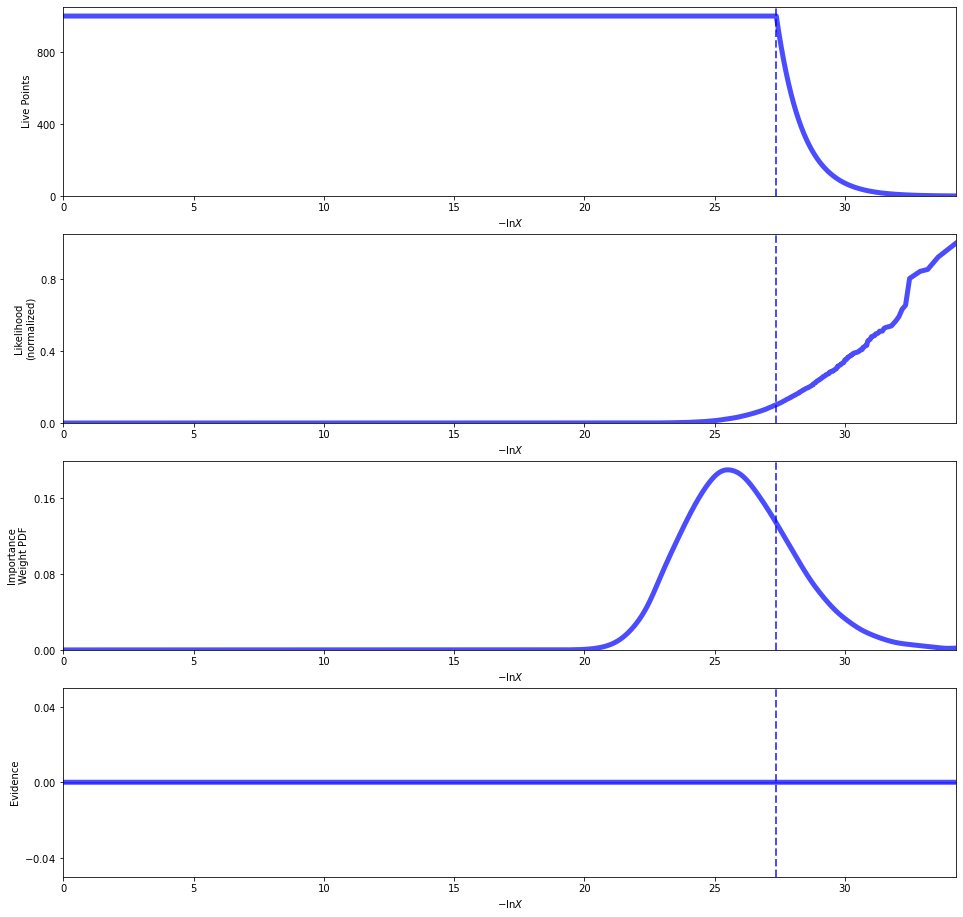

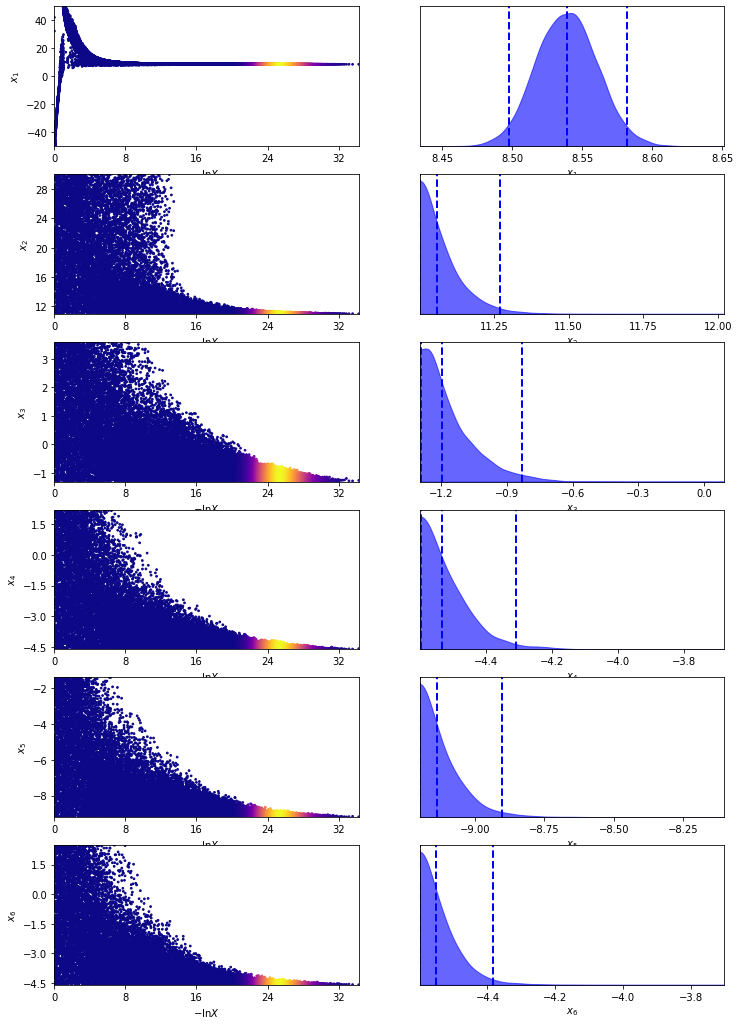

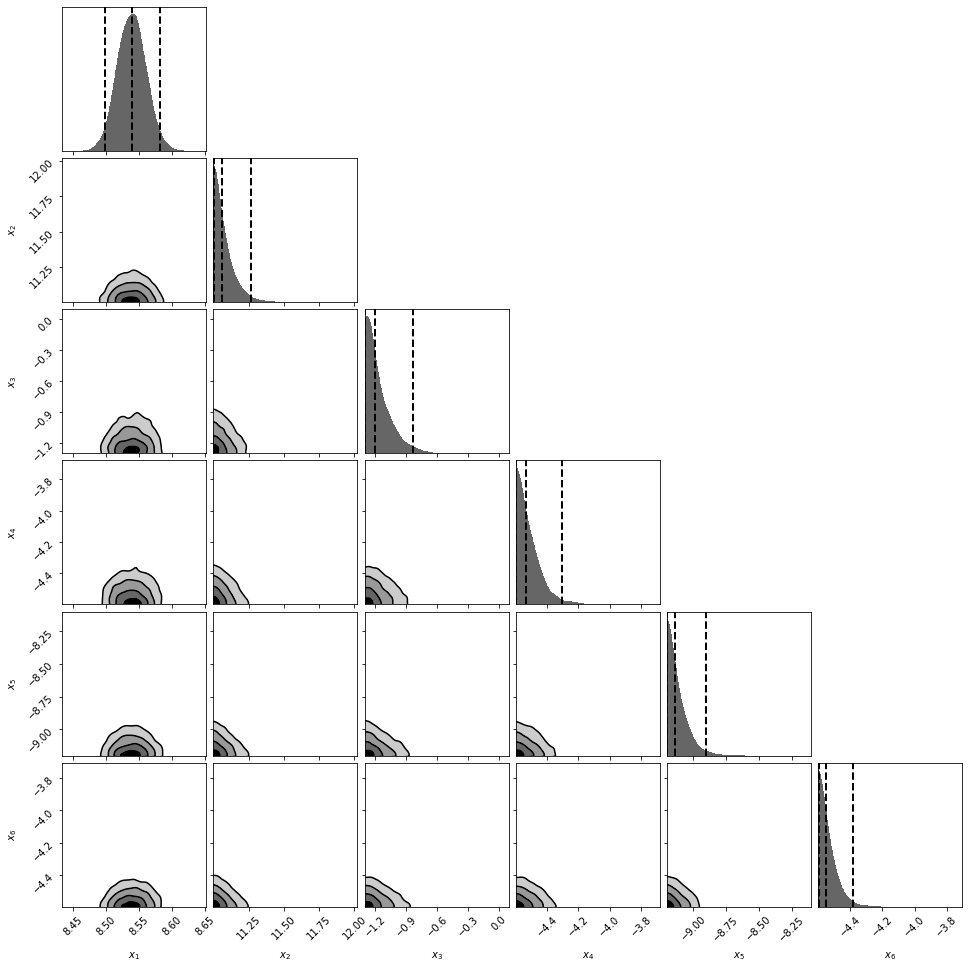

In [7]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

In [5]:
ndim = 6

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return - 1e14

def ptform(u):
    #  [-50,50] [0,30] [-3,3.6] [-8,2.2] [-16,-1.4] [-10,2.5]
    return [u[0]*100 -50, u[1]*30 , u[2]*6.6-3 , \
            u[3]*10.2-8 , u[4]*14.6-16 , u[5]*12.5-10 ]

In [6]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())

In [7]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results



iter: 16207 | +1000 | bound: 49 | nc: 1 | ncall: 110838 | eff(%): 15.524 | loglstar:   -inf < -25685.206 <    inf | logz: -25701.827 +/-  0.228 | dlogz:  0.002 >  1.009                              

92078.00864839554


/users/eteng/software/et_env/lib/python3.6/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


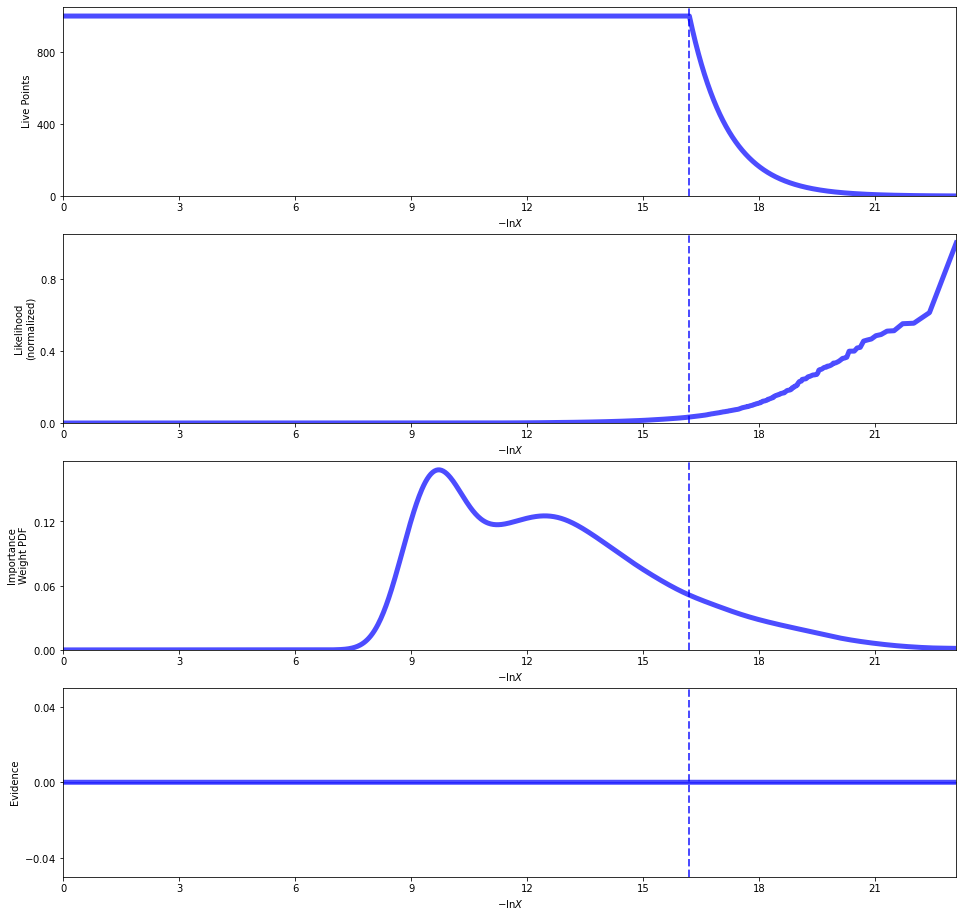

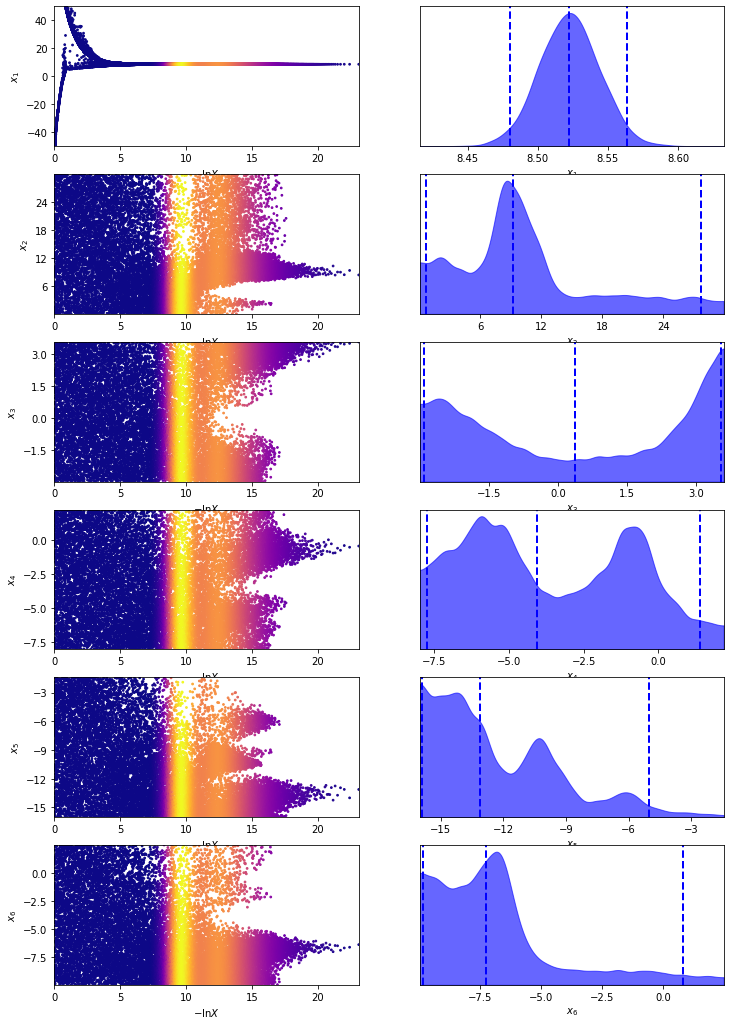

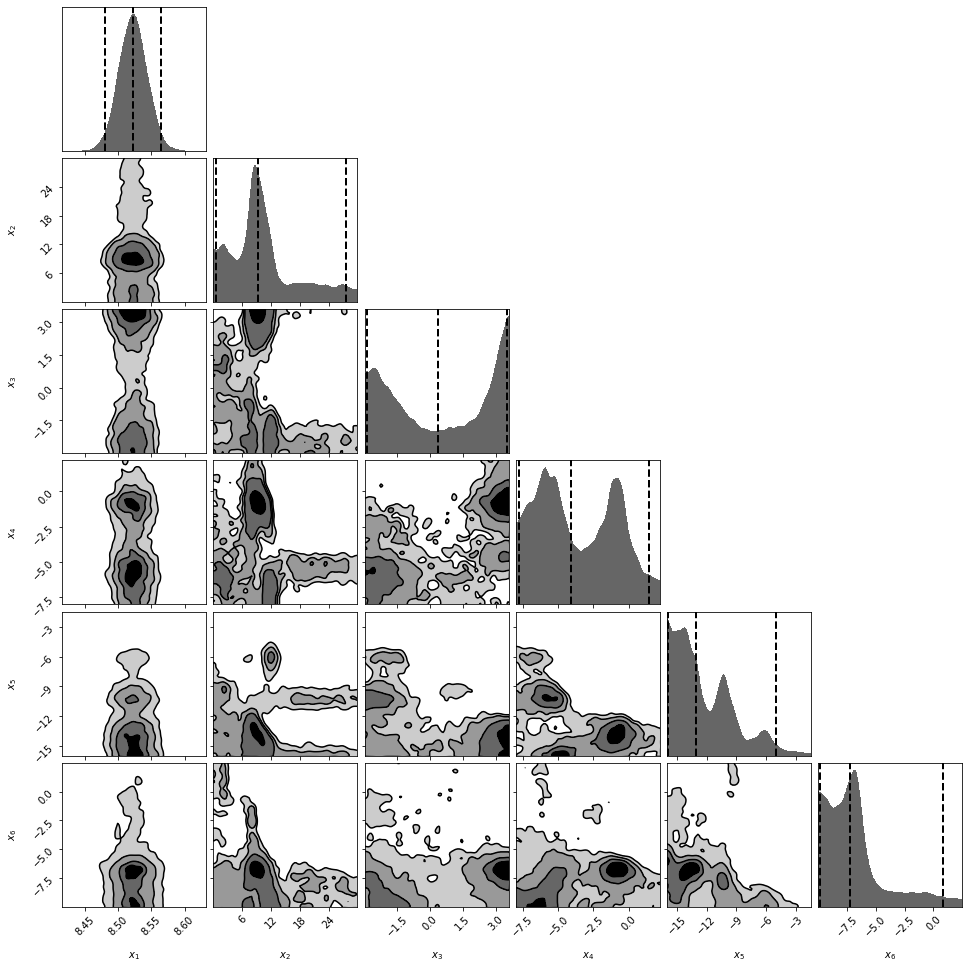

In [8]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteri ors.
cfig, caxes = dyplot.cornerplot(results)